<a href="https://colab.research.google.com/github/rsonar821/Unsupervised-Learning-Capstone-Project/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Project Title: Book Recommendation System using Collaborative Filtering</u>**







## **Recommendation System**

* During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

* In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

* Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# NearestNeighbors Algorithm
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Cosine Similarity Algorithm
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Books Dataframe**

This dataframe contains the information regarding the books. Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset.

### **Columns present in the dataset:**


*   **ISBN:** Unique ID to identify a book
*   **Book-Title:** Title of the book

*   **Book-Author:** Author of the book
*   **Year-Of-Publication:** The year in which the book was published

*   **Publisher:** Publisher of the book
*   **Image-URL-S:** Image URL of the book (Small Size)

*   **Image-URL-M:** Image URL of the book (Medium Size)
*   **Image-URL-L:** Image URL of the book (Large Size)









In [3]:
# Importing the books dataframe

books_df = pd.read_csv('/content/drive/MyDrive/Books.csv')

In [4]:
# Printing the first 5 rows of the books dataframe

books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Printing the last 5 rows of the books dataframe

books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
# Checking the number of rows and columns of the books dataframe

print(f'The books dataframe has {books_df.shape[0]} rows and {books_df.shape[1]} columns')

The books dataframe has 271360 rows and 8 columns


In [7]:
# Printing the columns of the books dataframe

books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
# Checking the datatype of each column of the books dataframe

books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [9]:
# Checking if any duplicate rows in the books dataframe

books_df.duplicated().sum()

0

In [10]:
# Dropping the columns which are not required for the analysis

books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [11]:
# Renaming the columns for easiness

books_df.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author',
                           'Year-Of-Publication':'Publication Year'}, inplace=True)

In [12]:
# Checking the unique number of entries in each column

books_df.nunique()

ISBN                271360
Title               242135
Author              102023
Publication Year       202
Publisher            16807
dtype: int64

In [13]:
# Checking the basic information of the books dataframe

books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271360 non-null  object
 1   Title             271360 non-null  object
 2   Author            271359 non-null  object
 3   Publication Year  271360 non-null  object
 4   Publisher         271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [14]:
# Printing the statistical information of the books dataframe

books_df.describe(include = 'all')

,ISBN,Title,Author,Publication Year,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [15]:
# Checking the number of null values in the books dataframe

books_df.isnull().sum()

ISBN                0
Title               0
Author              1
Publication Year    0
Publisher           2
dtype: int64

In [16]:
# Replacing the null values of the 'Author' column with the maximum repeated author
books_df['Author'].fillna('Agatha Christie', inplace=True)

# Replacing the null values of the 'Publisher' column with the maximum repeated publisher
books_df['Publisher'].fillna('Harlequin', inplace=True)

In [17]:
# Again checking the number of null values in the books dataframe

books_df.isnull().sum()

ISBN                0
Title               0
Author              0
Publication Year    0
Publisher           0
dtype: int64

### Top 10 authors who have written maximum number of books

In [18]:
# Creating a dataframe of authors having written maximum number of books
top_authors = pd.DataFrame(books_df['Author'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_authors.rename(columns = {'index':'Author', 'Author':'Count'}, inplace = True)

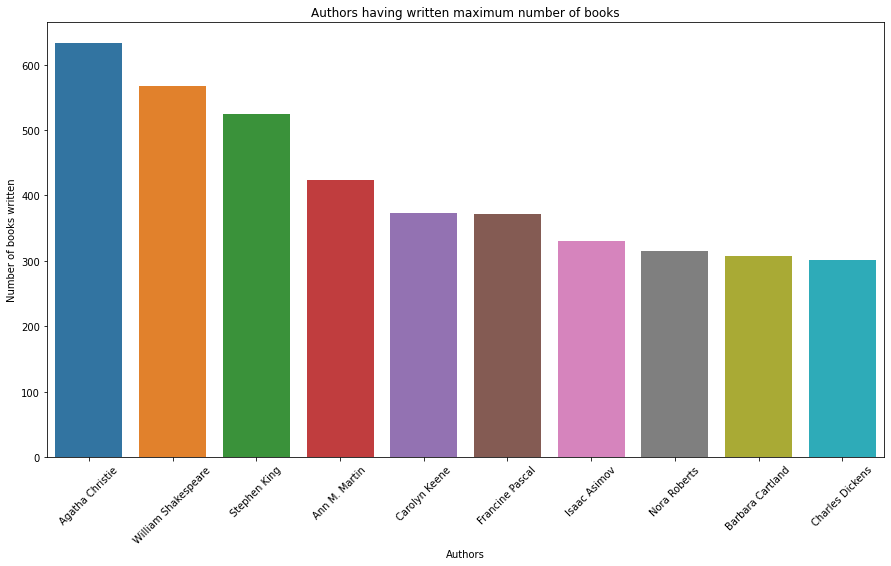

In [19]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x = 'Author', y = 'Count', data = top_authors)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Authors having written maximum number of books')
figure.set(xlabel='Authors', ylabel='Number of books written')

# Displaying the graph
plt.show(figure)

### Top 10 years in which maximum number of books were published

In [20]:
# Creating a dataframe of years in which maximum number of books were published
top_years = pd.DataFrame(books_df['Publication Year'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_years.rename(columns = {'index':'publication_year', 'Publication Year':'Count'}, inplace=True)

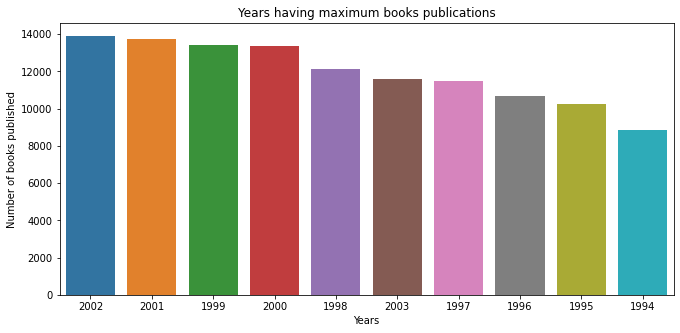

In [21]:
# Defining the plot size
plt.figure(figsize=(11,5))

# Plotting a bargraph
figure = sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year)

# Defining the title, xticks rotation and x and y labels
figure.set(title='Years having maximum books publications')
figure.set(xlabel='Years', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

### Top 10 publishers who have published maximum number of books

In [22]:
# Creating a dataframe of publishers having published maximum number of books
top_publishers = pd.DataFrame(books_df['Publisher'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)

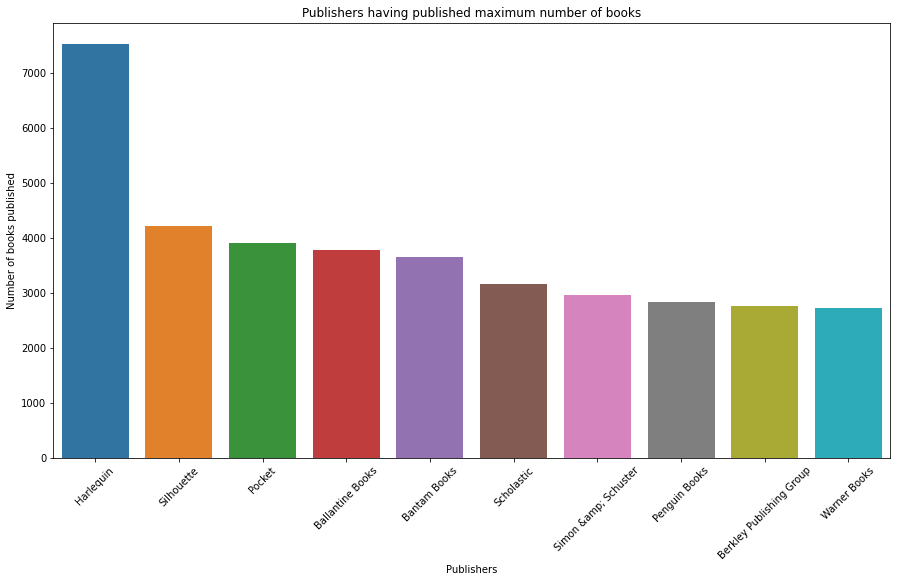

In [23]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x='Publisher', y='Count', data=top_publishers)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Publishers having published maximum number of books')
figure.set(xlabel='Publishers', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

### Top 10 titles of the books repeated for maximum number of times

In [24]:
# Creating a dataframe of the titles repeated maximum number of times
top_titles = pd.DataFrame(books_df['Title'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_titles.rename(columns = {'index':'Title', 'Title':'Count'}, inplace = True)

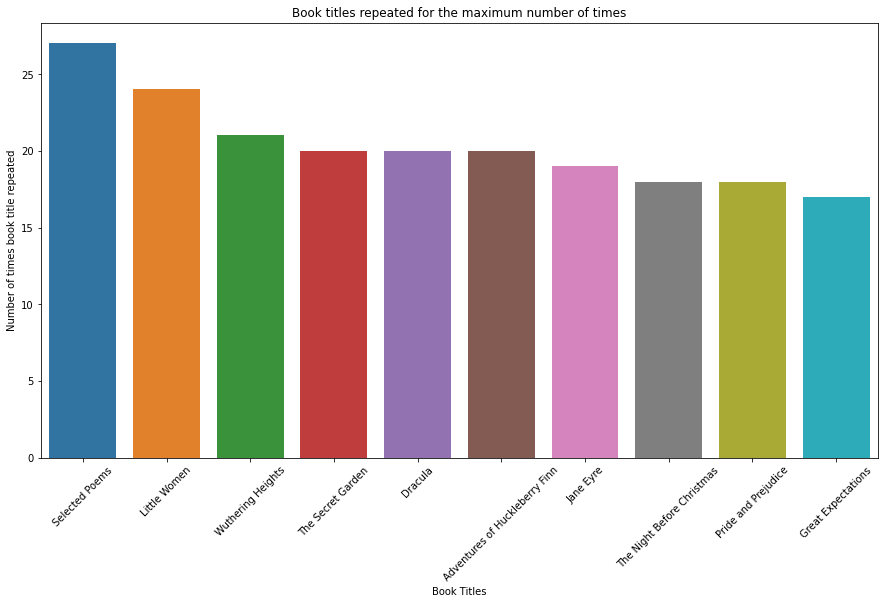

In [25]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x = 'Title', y = 'Count', data = top_titles)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Book titles repeated for the maximum number of times')
figure.set(xlabel='Book Titles', ylabel='Number of times book title repeated')

# Displaying the graph
plt.show(figure)

## **Users Dataframe**

This dataframe contains the information related to the users who read the books.

### **Columns present in the dataset:**


*   **User-ID:** Unique ID of the user
*   **Location:** Location of the user

*   **Age:** Age of the user

In [26]:
# Importing the users dataframe

users_df = pd.read_csv('/content/drive/MyDrive/Users.csv')

In [27]:
# Printing the first 5 rows of the users dataframe

users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
# Printing the last 5 rows of the users dataframe

users_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [29]:
# Checking the number of rows and columns of the books dataframe

print(f'The users dataframe has {users_df.shape[0]} rows and {users_df.shape[1]} columns')

The users dataframe has 278858 rows and 3 columns


In [30]:
# Printing the columns present in the users dataframe

users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [31]:
# Checking the datatype of each column of the users dataframe

users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [32]:
# Checking if any duplicate rows in the users dataframe

users_df.duplicated().sum()

0

In [33]:
# Renaming the columns

users_df.rename(columns = {'User-ID':'user_id'}, inplace = True)

In [34]:
# Checking the unique number of entries in each column

users_df.nunique()

user_id     278858
Location     57339
Age            165
dtype: int64

In [35]:
# Checking the basic information of the users dataframe

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [36]:
# Printing the statistical information of the users dataframe

users_df.describe(include = 'all')

,user_id,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [37]:
# Checking the number of null values in the users dataframe

users_df.isnull().sum()

user_id          0
Location         0
Age         110762
dtype: int64

In [38]:
# Getting the percentage of missing data

(users_df.isnull().sum()/users_df.shape[0])*100

user_id      0.000000
Location     0.000000
Age         39.719857
dtype: float64

Almost 40% data for the age column is missing, so it should not be imputed with any alternatives. Also the 'age' column would not be used in the analysis further

In [39]:
# Defining a function to get the country of the user from the location

def country(string):
  '''
  It returns the country from the location of the user
  '''
  country = string.rpartition(' ')[-1]
  if country=='zealand':
    return 'new zealand'
  if country=='kingdom':
    return 'united kingdom'
  else:
    return country

In [40]:
# Creating a new column 'Country' to store country from the location

users_df['Country'] = users_df['Location'].apply(country)

### Top 10 countries where maximum number of the users are based from

In [41]:
# Creating a dataframe of the countries where maximum number of users are based
top_countries = pd.DataFrame(users_df['Country'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_countries.rename(columns = {'index':'Country', 'Country':'Count'}, inplace=True)

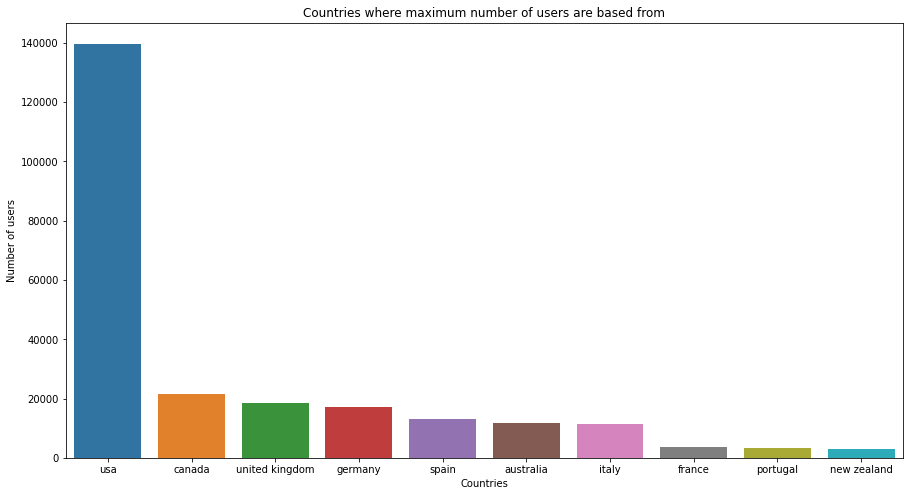

In [42]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x='Country', y='Count', data=top_countries)

# Defining the title and x and y labels
figure.set(title='Countries where maximum number of users are based from')
figure.set(xlabel='Countries', ylabel='Number of users')

# Displaying the graph
plt.show(figure)

### Distribution of the user's age reading books

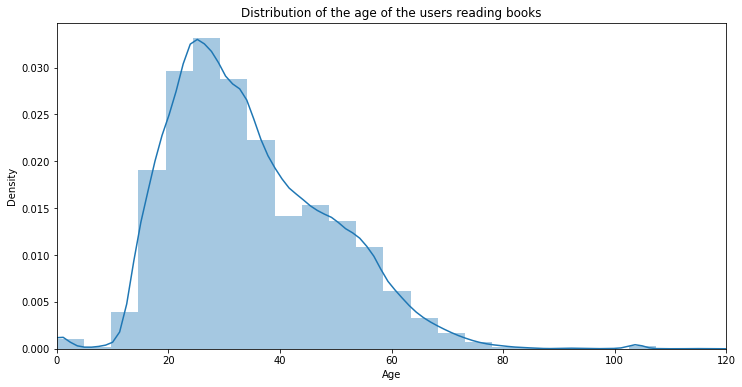

In [43]:
# Defining the plot size
plt.figure(figsize=(12,6))

# Plotting a distribution plot
figure = sns.distplot(users_df['Age'])

# Defining the title and x and y labels
figure.set(title='Distribution of the age of the users reading books')
figure.set(xlabel='Age')

# Defining the x-axis data range
plt.xlim(0, 120)

# Displaying the graph
plt.show(figure)

## **Rating Dataframe**

This dataframe contains the book rating information.

Book-Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### **Columns present in the dataset:**


*   **User-ID:** Unique ID of the user
*   **ISBN:** Unique ID to identify a book

*   **Book-Rating:** Ratings of the book (In the range of 0-10)

In [44]:
# Importing the ratings dataframe

ratings_df = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

In [45]:
# Printing the first 5 rows of the ratings dataframe

ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
# Printing the last 5 rows of the ratings dataframe

ratings_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [47]:
# Checking the number of rows and columns of the ratings dataframe

print(f'The ratings dataframe has {ratings_df.shape[0]} rows and {ratings_df.shape[1]} columns')

The ratings dataframe has 1149780 rows and 3 columns


In [48]:
# Printing the columns present in the ratings dataframe

ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [49]:
# Checking the datatype of each column of the ratings dataframe

ratings_df.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [50]:
# Checking if any duplicate rows in the ratings dataframe

ratings_df.duplicated().sum()

0

In [51]:
# Renaming the columns

ratings_df.rename(columns = {'User-ID':'user_id', 'Book-Rating':'Rating'}, inplace = True)

In [52]:
# Checking the unique number of entries in each column

ratings_df.nunique()

user_id    105283
ISBN       340556
Rating         11
dtype: int64

In [53]:
# Checking the basic information of the ratings dataframe

ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [54]:
# Printing the statistical information of the ratings dataframe

ratings_df.describe(include = 'all')

,user_id,ISBN,Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [55]:
# Checking the number of null values in the ratings dataframe

ratings_df.isnull().sum()

user_id    0
ISBN       0
Rating     0
dtype: int64

### Top 10 users who have rated maximum number of times on the books

In [56]:
# Creating a dataframe of the users who have maximum number of times on the books 
top_users = pd.DataFrame(ratings_df['user_id'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_users.rename(columns = {'index':'user_id', 'user_id':'Count'}, inplace=True)

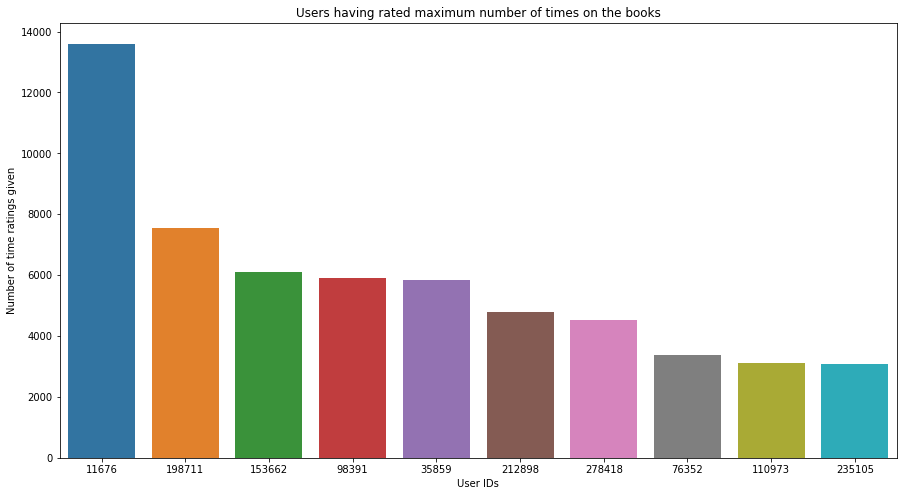

In [57]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x='user_id', y='Count', data=top_users, order=top_users.sort_values('Count', ascending=False).user_id)

# Defining the title and x and y labels
figure.set(title='Users having rated maximum number of times on the books')
figure.set(xlabel='User IDs', ylabel='Number of time ratings given')

# Displaying the graph
plt.show(figure)

### Number of different ratings received on the books

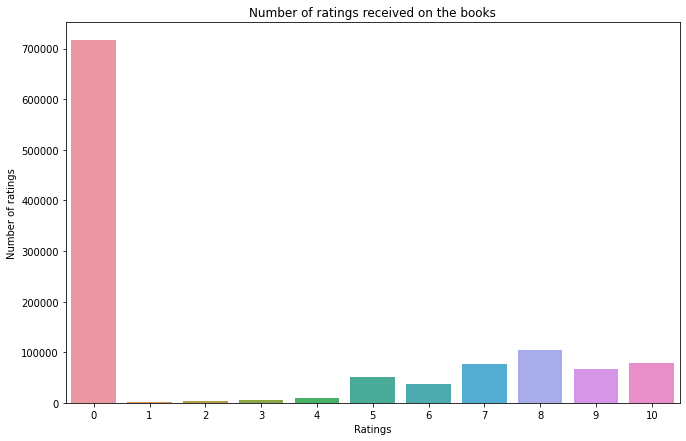

In [58]:
# Defining the plot size
plt.figure(figsize=(11,7))

# Plotting a bargraph
figure = sns.countplot(x=ratings_df['Rating'])

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

### Number of different ratings received on the books excluding 0 rating

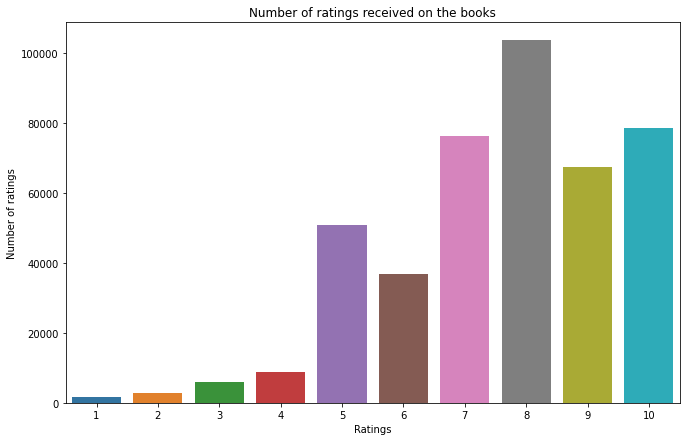

In [59]:
# Creating a dataframe with no 0 ratings
rating = ratings_df[ratings_df['Rating']!=0]

# Defining the plot size
plt.figure(figsize=(11,7))

# Plotting a bargraph
figure = sns.countplot(x = rating['Rating'], data=rating)

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

### Top 10 most popular books on the basis of ratings

In [60]:
# Creating a dataframe by merging books and ratings dataframe

books_ratings_df = books_df.merge(ratings_df, on='ISBN')

In [61]:
# Groupby on book title by counting the number of ratings
num_rating_book_df = books_ratings_df.groupby('Title').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_book_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_book_df.head()

,Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [62]:
# Groupby on book title by taking the ratings average
avg_rating_book_df = books_ratings_df.groupby('Title').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_book_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_book_df.head()

,Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [63]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_books_df = num_rating_book_df.merge(avg_rating_book_df, on='Title')

# Printing the first 5 rows of the dataframe
popular_books_df.head()

,Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [64]:
# Selecting the books which have received ratings 200 and above and arranging the average ratings in descending order
popular_books_df = popular_books_df[popular_books_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular books on the basis of ratings
popular_books_df

,Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


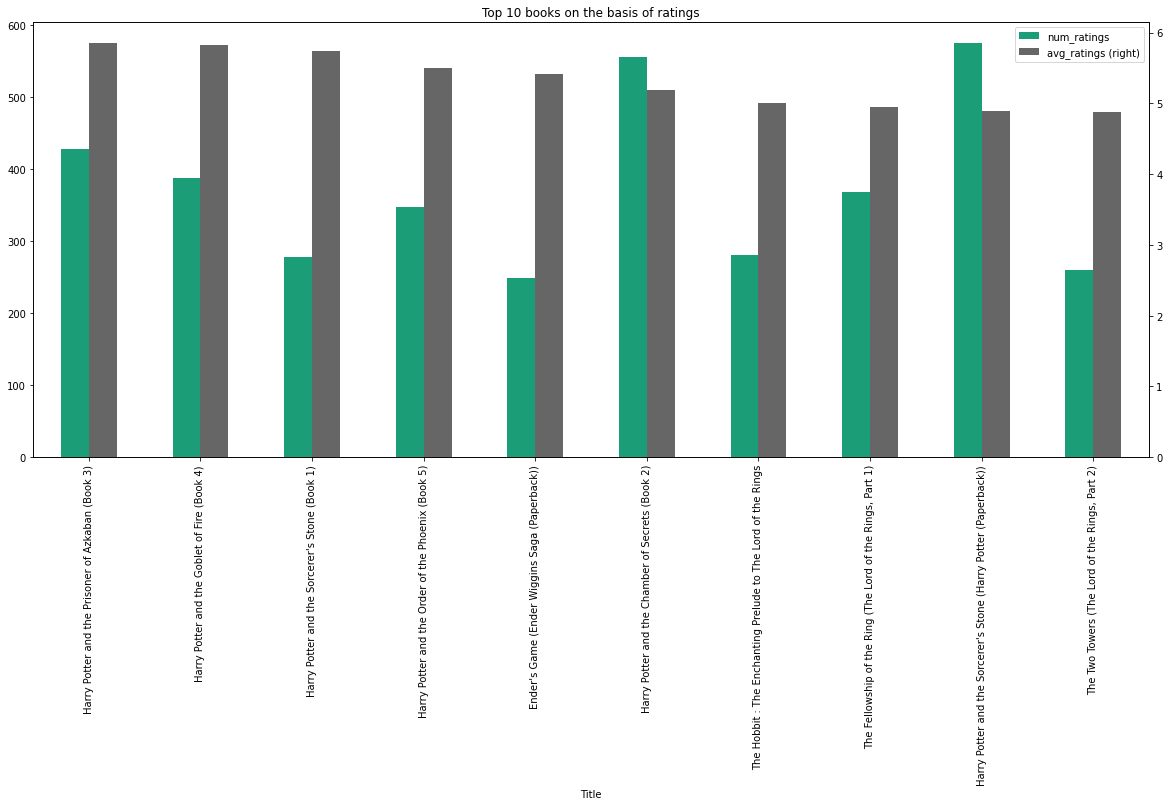

In [65]:
# Ploting the bargraph of the top 10 most popular books

popular_books_df.plot(x='Title', title='Top 10 books on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(20,8),
                      secondary_y='avg_ratings')

In [66]:
# Getting all the details of the top 10 most popular books

popular_books_df.merge(books_df, on='Title').drop_duplicates('Title')

,Title,num_ratings,avg_ratings,ISBN,Author,Publication Year,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic
13,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,0312853238,Orson Scott Card,1992,Tor Books
17,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic
20,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey
21,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey
30,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books
32,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey


### Top 10 most popular authors on the basis of ratings

In [67]:
# Groupby on book author by counting the number of ratings
num_rating_author_df = books_ratings_df.groupby('Author').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_author_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_author_df.head()

,Author,num_ratings
0,D. Chiel,4
1,J. D. Landis,1
2,Mimma Balia,1
3,'N Sync,1
4,142 moms from all over the world,1


In [68]:
# Groupby on book author by taking the ratings average
avg_rating_author_df = books_ratings_df.groupby('Author').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_author_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_author_df.head()

,Author,avg_ratings
0,D. Chiel,2.5
1,J. D. Landis,0.0
2,Mimma Balia,8.0
3,'N Sync,0.0
4,142 moms from all over the world,5.0


In [69]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_authors_df = num_rating_author_df.merge(avg_rating_author_df, on='Author')

# Printing the first 5 rows of the dataframe
popular_authors_df.head()

,Author,num_ratings,avg_ratings
0,D. Chiel,4,2.5
1,J. D. Landis,1,0.0
2,Mimma Balia,1,8.0
3,'N Sync,1,0.0
4,142 moms from all over the world,1,5.0


In [70]:
# Selecting the authors who have received ratings 200 and above and arranging the average ratings in descending order
popular_authors_df = popular_authors_df[popular_authors_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular authors on the basis of ratings
popular_authors_df

,Author,num_ratings,avg_ratings
9642,Bill Watterson,550,5.561818
5680,Antoine de Saint-ExupÃ©ry,278,5.553957
40389,J. K. Rowling,2908,5.385832
72430,Nick Bantock,270,5.292593
40548,J. R. R. Tolkien,978,5.165644
24644,Dr. Seuss,371,5.121294
19168,Daniel Quinn,264,5.045455
36575,Harper Lee,534,4.728464
40806,J.R.R. Tolkien,285,4.694737
56653,LOIS LOWRY,310,4.638710


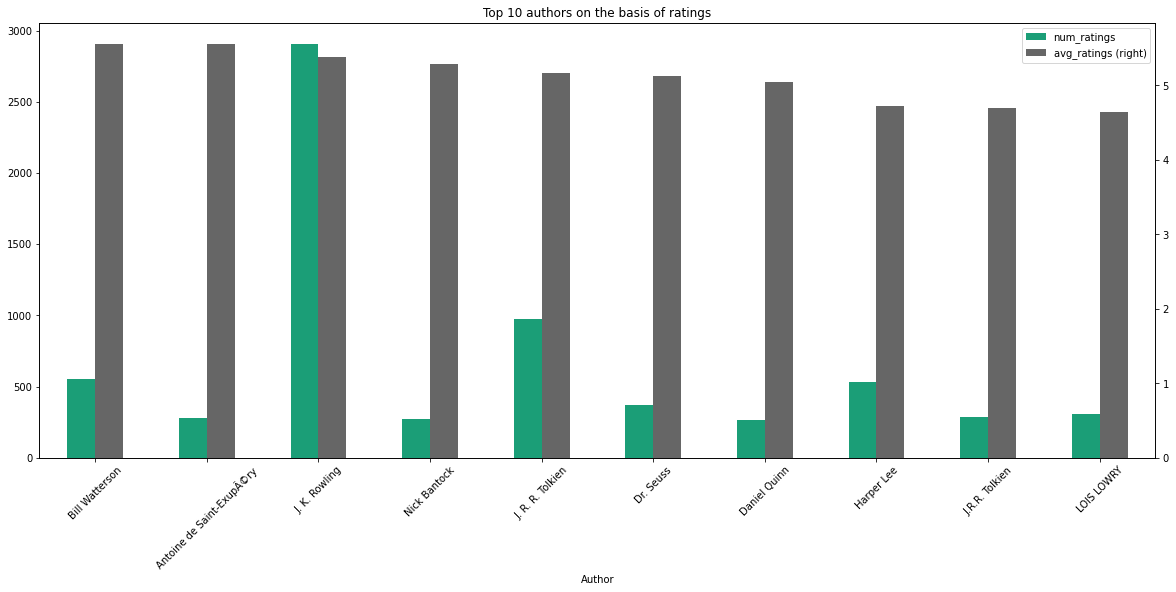

In [71]:
# Ploting the bargraph of the top 10 most popular authors

popular_authors_df.plot(x='Author', title='Top 10 authors on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(20,8),
                      secondary_y='avg_ratings', rot=45)

In [72]:
# Getting all the details of the top 10 most popular authors

popular_authors_df.merge(books_df, on='Author').drop_duplicates('Author')

,Author,num_ratings,avg_ratings,ISBN,Title,Publication Year,Publisher
0,Bill Watterson,550,5.561818,0836218256,Something Under the Bed Is Drooling,1988,Andrews McMeel Publishing
42,Antoine de Saint-ExupÃ©ry,278,5.553957,0156528207,The Little Prince,1968,Harcourt
63,J. K. Rowling,2908,5.385832,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,1999,Arthur A. Levine Books
141,Nick Bantock,270,5.292593,0811802981,The Golden Mean: In Which the Extraordinary Co...,1993,Chronicle Books
159,J. R. R. Tolkien,978,5.165644,8445071408,El Senor De Los Anillos: LA Comunidad Del Anil...,2001,Minotauro
333,Dr. Seuss,371,5.121294,039480001X,The Cat in the Hat,1957,Random House Books for Young Readers
373,Daniel Quinn,264,5.045455,0553375407,Ishmael: An Adventure of the Mind and Spirit,1995,Bantam
392,Harper Lee,534,4.728464,0446310786,To Kill a Mockingbird,1988,Little Brown &amp; Company
407,J.R.R. Tolkien,285,4.694737,0618126988,The Silmarillion,2001,Houghton Mifflin
453,LOIS LOWRY,310,4.638710,0440219078,The Giver (21st Century Reference),1994,Laure Leaf


### Top 10 most popular publishers on the basis of ratings

In [73]:
# Groupby on book publisher by counting the number of ratings
num_rating_pub_df = books_ratings_df.groupby('Publisher').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_pub_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_pub_df.head()

,Publisher,num_ratings
0,Editions P. Terrail,1
1,Tri-State Press,1
2,'K' Pub,1
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1
4,"(49 Poland St., W.1), BPC Unit 75",1


In [74]:
# Groupby on book publisher by taking the ratings average
avg_rating_pub_df = books_ratings_df.groupby('Publisher').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_pub_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_pub_df.head()

,Publisher,avg_ratings
0,Editions P. Terrail,10.0
1,Tri-State Press,6.0
2,'K' Pub,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",0.0
4,"(49 Poland St., W.1), BPC Unit 75",0.0


In [75]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_publishers_df = num_rating_pub_df.merge(avg_rating_pub_df, on='Publisher')

# Printing the first 5 rows of the dataframe
popular_publishers_df.head()

,Publisher,num_ratings,avg_ratings
0,Editions P. Terrail,1,10.0
1,Tri-State Press,1,6.0
2,'K' Pub,1,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1,0.0
4,"(49 Poland St., W.1), BPC Unit 75",1,0.0


In [76]:
# Selecting the publishers who have received ratings 200 and above and arranging the average ratings in descending order
popular_publishers_df = popular_publishers_df[popular_publishers_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular publishers on the basis of ratings
popular_publishers_df

,Publisher,num_ratings,avg_ratings
5400,Five Star (ME),207,7.884058
14873,TokyoPop,205,6.570732
14874,Tokyopop,310,6.277419
3725,DC Comics,529,5.913043
1201,Authorhouse,224,5.285714
15089,Tusquets,274,4.861314
1008,Arthur A. Levine Books,629,4.786963
758,Andrews McMeel Publishing,2589,4.685207
2808,Celestial Arts,247,4.672065
16444,Writers Club Press,293,4.668942


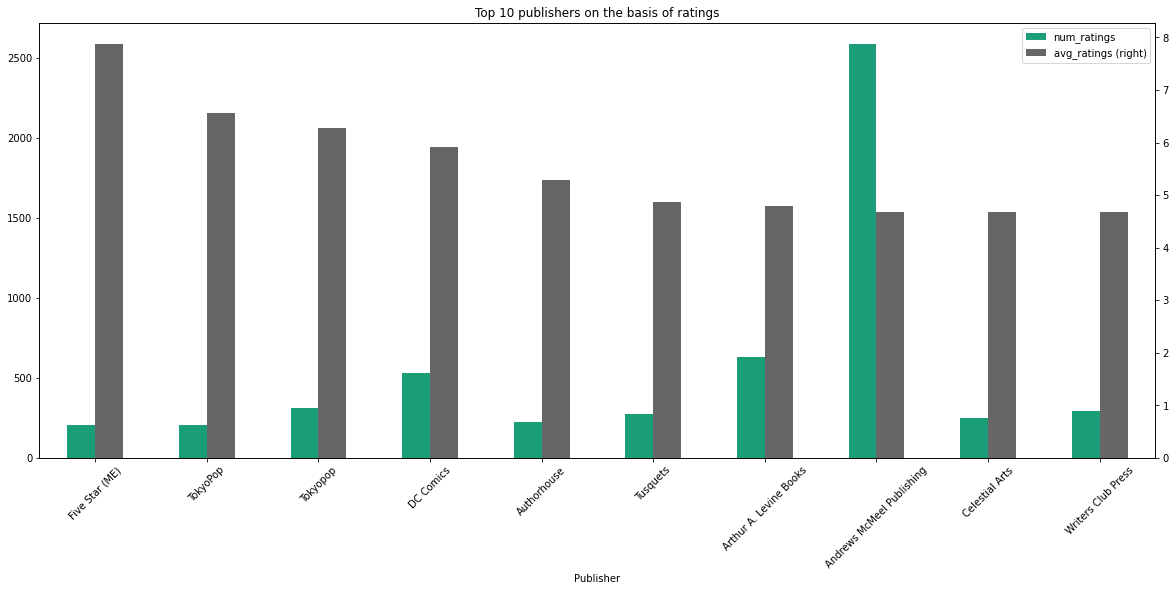

In [77]:
# Ploting the bargraph of the top 10 most popular publishers

popular_publishers_df.plot(x='Publisher', title='Top 10 publishers on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(20,8),
                      secondary_y='avg_ratings', rot=45)

In [78]:
# Getting all the details of the top 10 most popular publishers

popular_publishers_df.merge(books_df, on='Publisher').drop_duplicates('Publisher')

,Publisher,num_ratings,avg_ratings,ISBN,Title,Author,Publication Year
0,Five Star (ME),207,7.884058,1594140812,Becoming Maren,Africa Fine,2003
183,TokyoPop,205,6.570732,1591822580,Chobits (Chobits),Clamp,2003
285,Tokyopop,310,6.277419,1591824095,"Chobits, Book 8",Clamp,2003
427,DC Comics,529,5.913043,1401201172,"League of Extraordinary Gentlemen, Vol. 2 (Comic)",Alan Moore,2003
584,Authorhouse,224,5.285714,1418447293,The Thoughts of an Emigrant,Albert Schwarzenbach,2004
741,Tusquets,274,4.861314,8472238822,Tu Nombre Escrito En El Agua (La Sonrisa Verti...,Irene Gonzalez Frei,2002
903,Arthur A. Levine Books,629,4.786963,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999
923,Andrews McMeel Publishing,2589,4.685207,0740700235,Life Messages: Inspiration For The Woman's Spirit,Josephine Carlton,2002
1490,Celestial Arts,247,4.672065,0890877564,Totally Muffins Cookbook (Totally Cookbooks),Helene Siegel,1995
1604,Writers Club Press,293,4.668942,0595168442,Cigar Box,Wilbur Witt,2001


## **Collaborative Filtering Model**

Selecting the users who have rated atleast on 200 books to get genuine users in the model

In [79]:
# Filtering the users who have rated on atleast 200 books
users = books_ratings_df.groupby('user_id').count()['Title']>=200

# Extracting the user_id of the filtered users
req_users = users[users].index

In [80]:
# Filtering the dataframe by selecting the user_ids

filtered_df = books_ratings_df[books_ratings_df['user_id'].isin(req_users)]

Selecting the books which have received atleast 50 number of ratings to get genuine books in the model

In [81]:
# Selecting the books which have received atleast 50 ratings
books = filtered_df.groupby('Title').count()['Rating']>=50

# Extracting the book names
req_books = books[books].index

In [82]:
# Filtering the dataframe by selecting the book names

final_df = filtered_df[filtered_df['Title'].isin(req_books)]

In [83]:
# Creating a pivot table

pivot_table = final_df.pivot_table(index = 'Title', columns = 'user_id', values = 'Rating')

In [84]:
# Printing the first 5 rows of the pivot table

pivot_table.head()

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Replacing the NaN values of the pivot table with 0

pivot_table.fillna(0, inplace=True)

In [86]:
# Printing the first 5 rows of the pivot table

pivot_table.head()

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cosine Similarity**

In [87]:
# Calculating the distance between vectors

similarity_scores = cosine_similarity(pivot_table)

In [88]:
# Creating a function for book recommendation

def recommend_books(book_name):
  '''
  Recommends 5 books on the basis of the input book
  '''
  index = np.where(pivot_table.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:6]

  print('The book recommendations for you are:\n')
  for i in similar_items:
    print(pivot_table.index[i[0]])

In [89]:
# Testing the model

recommend_books('1984')

The book recommendations for you are:

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [90]:
# Testing the model

recommend_books('Harry Potter and the Chamber of Secrets (Book 2)')

The book recommendations for you are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [91]:
# Testing the model

recommend_books('1st to Die: A Novel')

The book recommendations for you are:

Along Came a Spider (Alex Cross Novels)
Roses Are Red (Alex Cross Novels)
Pop Goes the Weasel
Violets Are Blue
Lightning


### **Nearest Neighbors Algorithm**

In [92]:
# Converting the pivot table to a sparse matrix

books_pivot_sparse = csr_matrix(pivot_table)

In [93]:
# Assigning the model

model = NearestNeighbors(algorithm='auto')

In [94]:
# Fitting the model

model.fit(books_pivot_sparse)

NearestNeighbors()

In [95]:
# Creating a function for book recommendation
def recommend_book(book):
  '''
  Recommends 5 books on the basis of the input book
  '''
  index=np.where(pivot_table.index==book)[0][0]
  distances, names = model.kneighbors(pivot_table.iloc[index,:].values.reshape(1,-1), n_neighbors=6)
  
  for i in range(len(names)):
    print('The book recommendations for you are:\n')
    a = list(pivot_table.index[names[i]][1:])
    print(*a, sep='\n')

In [96]:
# Testing the model

recommend_book('1984')

The book recommendations for you are:

No Safe Place
A Civil Action
Foucault's Pendulum
Exclusive
Waiting to Exhale


In [97]:
# Testing the model

recommend_book('Harry Potter and the Chamber of Secrets (Book 2)')

The book recommendations for you are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))


In [98]:
# Testing the model

recommend_book('1st to Die: A Novel')

The book recommendations for you are:

Exclusive
The Cradle Will Fall
Deck the Halls (Holiday Classics)
A Civil Action
No Safe Place
